# Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 70296 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [4]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

In [14]:
!pip install opencv-python

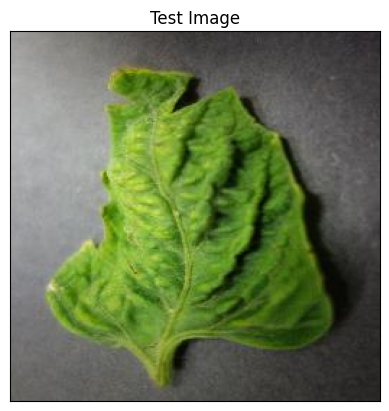

In [5]:
#Test Image Visualization
import cv2
image_path = 'Plant_DIsease_Dataset/test/test/TomatoYellowCurlVirus4.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 282ms/step


In [7]:
print(predictions)

[[1.5554917e-12 3.6012178e-14 3.0870996e-08 1.5935345e-11 1.6844801e-10
  7.5424939e-10 3.9305161e-12 3.3578619e-11 1.0360622e-12 4.8700089e-12
  3.7850344e-12 3.7959950e-08 7.6112885e-09 4.7168294e-07 8.7578729e-11
  3.4632644e-10 1.3652131e-11 3.2365727e-12 1.2379502e-09 2.3161417e-09
  2.7506316e-14 7.0167999e-12 1.9680124e-10 8.1228350e-08 4.3506126e-11
  5.6144578e-10 1.9877379e-11 2.0329757e-10 1.9566187e-07 2.0203905e-07
  1.4736425e-07 1.1222754e-09 6.4348471e-10 8.7672632e-08 4.1085929e-08
  9.9999869e-01 1.5291727e-08 2.0349387e-10]]


In [8]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


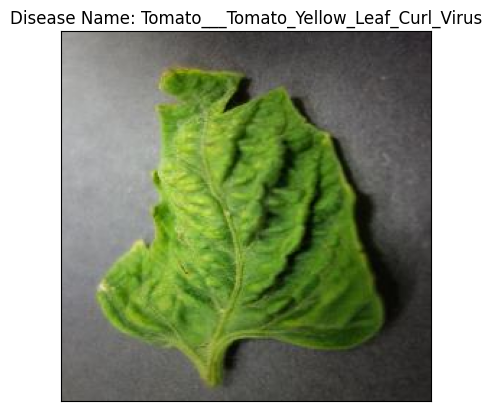

In [10]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
model_prediction

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'